In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def describe(df):
    """
    Program that describe a dataset.
    """
    dfNum = df.select_dtypes(include=['int64','float64'])
    stats = pd.DataFrame(columns=dfNum.columns)
    col_name=stats.columns
    for i in range (len(stats.columns)):
        col = df.loc[:, col_name[i]]
        col_allNum = df.loc[~col.isna(), col_name[i]]
        count = len(col_allNum)
        mean = sum(col_allNum) / len(col_allNum)
        var =  sum([(x - mean)**2 for x in col_allNum])/count
        std = var**(0.5)
        stats.loc['Mean', col_name[i]] = mean
        stats.loc['Std', col_name[i]] = std
    return stats

In [3]:
def normalize_value(df):
    dfNum = df.select_dtypes(include=['int64','float64'])
    stats = describe(dfNum)
    dfN = df.copy()
    for i in range(len(dfNum.columns)):
        mean = stats.loc["Mean", dfNum.columns[i]]
        std = stats.loc["Std", dfNum.columns[i]]
        dfN.loc[:, dfNum.columns[i]] = (dfN.loc[:, dfNum.columns[i]] - mean) / std
    return dfN

In [4]:
def computeCost(X, y, W, b, lambda_ = 1):
    """
    X (ndarray (m,n): Data, m examples with n features
    y (ndarray (m,)): target values
    w (ndarray (n,)): model parameters
    b (scalar)      : model parameter
    lambda_ (scalar): Controls amount of regularization
    Returns:
        cost (scalar):  cost
    """
    m, n = X.shape
    cost = 0
    for i in range(m):
        z = np.dot(W, X.iloc[i].values) + b
        f_wb = 1 / (1 + np.exp(-z))
        cost += -y.iloc[i].item() * np.log(f_wb) - (1 - y.iloc[i].item())*np.log(1-f_wb)
    cost = cost / m
    reg_part = 0
    for i in range(n):
        reg_part += W[i]**2
    cost = cost + (lambda_ / (2*m)) * reg_part
    return cost

In [5]:
def updateWb(X, y, w, b, lambda_, alpha):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    for i in range(m):
        z = np.dot(X.iloc[i].values, w) + b
        f_wb_i = 1 / (1 + np.exp(-z))
        err_i  = f_wb_i  - y.iloc[i].item()
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X.iloc[i,j].item()
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]
    W_updated = w - alpha * dj_dw
    b_updated = b - alpha * dj_db
    return (W_updated, b_updated)

In [6]:
def executeGradientDescentAlgo(X, y, alpha, lambda_, nb_iter):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    result = []
    for i in range(nb_iter):
        w, b = updateWb(X, y, w, b, lambda_, alpha)
        result.append(computeCost(X, y, w, b, lambda_))
    return(w, b, result)

In [7]:
def logreg(df, house_name):
    df.loc[:,"Hogwarts House"] == house_name
    # df.loc[df.loc[:,"Hogwarts House"] == house_name, :]
    df.loc[df.loc[:,"Hogwarts House"] == house_name, "Test" + house_name] = 1
    df.loc[~(df.loc[:,"Hogwarts House"] == house_name), "Test" + house_name] = 0
    df.drop("Hogwarts House", axis=1, inplace=True)
    # df.drop("Astronomy", axis=1, inplace=True)
    for i in range(len(df.columns)):
        df = df.loc[~df.isna()[df.columns[i]], :]
    X = df.iloc[:, :len(df.columns)-1]
    y = df.iloc[:, len(df.columns)-1:]
    alpha = 0.3
    lambda_ = 1
    nb_iterations = 150
    return (executeGradientDescentAlgo(X, y, alpha, lambda_, nb_iterations))

In [8]:
def plot_algo_convergence(result_sly, result_rav, result_gryf, result_huf):
    x = range(len(result_sly))
    plt.plot(x, result_sly, 'g', label = "Slytherin")
    plt.plot(x, result_rav, 'b', label = "Ravenclaw")
    plt.plot(x, result_gryf, 'r', label = "Gryffindor")
    plt.plot(x, result_huf, 'y', label = "Hufflepuff")
    plt.xlabel("Algo iterations")
    plt.ylabel("Cost")
    plt.title("Evolution of the Cost with gradient descent iterations")
    plt.legend()
    plt.show()

In [9]:
df = pd.read_csv("../datasets/dataset_train.csv", index_col = "Index")

In [10]:
df_bis = df.drop(['First Name', 'Last Name', "Birthday", "Best Hand"], axis=1, inplace=False)

In [11]:
stats = describe(df_bis)

In [12]:
## on remplace les trous de donnes par le mean de la ligne
for i in range(1, len(df_bis.columns)):
    df_bis.loc[df_bis.iloc[:,i].isna(), df_bis.columns[i]] = stats.loc["Mean", df_bis.columns[i]]

## on Normalise les donnees
df_Normilised = normalize_value(df_bis)
df_Normilised.drop("Astronomy", axis=1, inplace=True)

In [13]:
df_Normilised

,Hogwarts House,Arithmancy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
Index,,,,,,,,,,,,,
0,Ravenclaw,0.530385,0.888115,1.020603e+00,0.382179,1.032825,0.349594,0.519639,0.222075,-0.692929,0.802318,1.204930,-0.500486
1,Slytherin,1.067170,-1.380435,1.144963e+00,-2.136447,-0.546438,-1.217971,0.262132,0.661039,0.416516,0.151316,-1.003297,-1.387362
2,Ravenclaw,-1.572018,1.274999,7.845560e-01,0.727777,1.849844,1.016698,0.135751,1.328864,0.891232,-0.481683,1.825755,0.086700
3,Gryffindor,-1.028564,-1.479153,-1.276948e+00,0.212548,-0.649717,0.268685,-1.780900,-2.513885,-1.645209,0.041074,-1.534279,1.830738
4,Gryffindor,0.637924,-1.735432,3.227141e-17,-0.223715,-0.456850,0.985667,-1.468090,-2.123341,-0.525889,-0.219665,-1.481955,1.393652
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Gryffindor,-0.037922,-1.100492,-6.113743e-01,0.621026,-0.567016,1.165485,-1.877609,-1.509564,-0.821660,-0.622106,-0.799418,1.678998
1596,Slytherin,0.828148,0.952772,-6.370527e-01,-0.340458,-0.870724,-0.475058,-0.166109,0.596941,-0.040135,-0.292550,-0.347662,0.234034
1597,Gryffindor,0.865065,-0.841277,-9.790565e-01,0.709498,-0.333915,1.327179,-2.050031,-1.746805,-1.360372,0.130350,-0.940950,1.808504


In [14]:
w_sly, b_sly, result_sly = logreg(df_Normilised.copy(), "Slytherin")

KeyboardInterrupt: 

In [ ]:
w_rav, b_rav, result_rav= logreg(df_Normilised.copy(), "Ravenclaw")
w_gryf, b_gryf, result_gryf = logreg(df_Normilised.copy(), "Gryffindor")
w_huf, b_huf, result_huf = logreg(df_Normilised.copy(), "Hufflepuff")

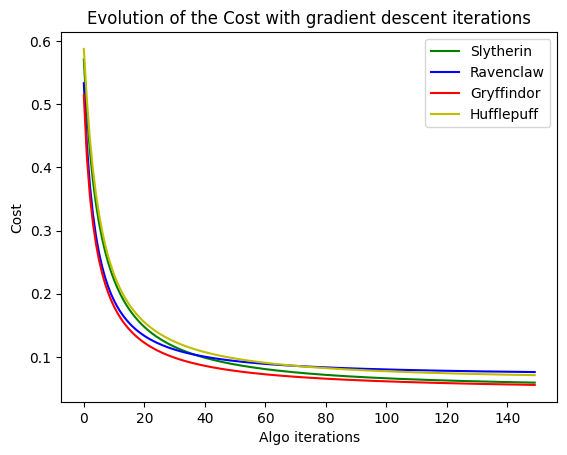

In [ ]:
plot_algo_convergence(result_sly, result_rav, result_gryf, result_huf)

In [ ]:
w_sly

array([-0.0016844 , -0.81605203,  0.88299004, -1.41100867, -0.24382747,
       -0.44663854,  0.02193593,  0.2453383 ,  0.54852283, -0.03049942,
       -0.49912446, -0.4846927 ])

In [ ]:
params = stats.copy()
params.drop("Astronomy", axis=1, inplace=True)

In [ ]:
params.loc["Slytherin", :] = w_sly
params.loc["Ravenclaw", :] = w_rav
params.loc["Gryffindor", :] = w_gryf
params.loc["Hufflepuff", :] = w_huf

In [ ]:
params.loc["Slytherin", "b"] = b_sly
params.loc["Ravenclaw", "b"] = b_rav
params.loc["Gryffindor", "b"] = b_gryf
params.loc["Hufflepuff", "b"] = b_huf

In [ ]:
params

,Arithmancy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying,b
Mean,49634.570243,1.14102,-0.387863,3.15391,-224.589915,495.74797,2.963095,1030.096946,5.950373,-0.053427,-243.374409,21.958012,NaN
Std,16496.3619,5.163925,5.160402,4.103031,480.842333,105.082654,4.364496,43.639829,3.11721,0.958929,8.780895,97.601087,NaN
Slytherin,-0.001684,-0.816052,0.88299,-1.411009,-0.243827,-0.446639,0.021936,0.245338,0.548523,-0.030499,-0.499124,-0.484693,-2.406276
Ravenclaw,0.166687,0.41267,0.944774,0.21728,1.213589,0.984844,0.065341,0.095903,0.065768,0.034886,1.058607,-0.020356,-1.745096
Gryffindor,-0.207399,-0.811745,-0.220382,0.343052,-0.11203,0.726121,-0.767974,-0.92508,-0.200255,-0.024253,-0.387215,0.817983,-2.166340
Hufflepuff,0.082123,1.198072,-1.621521,0.78405,-0.86731,-1.293874,0.661987,0.580578,-0.404292,-0.006501,-0.232844,-0.325355,-1.414893


In [ ]:
params.to_csv("params.csv", index=False)

In [18]:
w = np.zeros((4,12))

In [19]:
w

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [20]:
w = pd.DataFrame((4,12))

In [21]:
w


,0
0,4
1,12


In [22]:
df

,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
Index,,,,,,,,,,,,,,,,,,
0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Gryffindor,Jung,Blank,2001-09-14,Right,49009.0,354.280086,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83
1596,Slytherin,Shelli,Lock,1998-03-12,Left,63296.0,367.531174,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80
1597,Gryffindor,Benjamin,Christensen,1999-10-24,Right,63905.0,544.018925,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47


In [37]:
df_bis = df.drop(['First Name', 'Last Name', "Birthday", "Best Hand"], axis=1, inplace=False)
slytherin_df = df_bis.copy()
slytherin_df.loc[~(df.loc[:,"Hogwarts House"] == "Slytherin"), "Test Slytherin"] = 0
slytherin_df.loc[df.loc[:,"Hogwarts House"] == "Slytherin", "Test Slytherin"] = 1
slytherin_df.drop("Hogwarts House", axis=1, inplace=True)

In [35]:
X_slytherin = slytherin_df.iloc[:, :len(slytherin_df.columns)-1]

In [36]:
X_slytherin

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
Index,,,,,,,,,,,,,
0,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,49009.0,354.280086,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83
1596,63296.0,367.531174,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80
1597,63905.0,544.018925,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47


In [38]:
slytherin_df

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying,Test Slytherin
Index,,,,,,,,,,,,,,
0,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89,0.0
1,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45,1.0
2,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42,0.0
3,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64,0.0
4,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,49009.0,354.280086,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83,0.0
1596,63296.0,367.531174,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80,1.0
1597,63905.0,544.018925,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47,0.0


In [39]:
y_slytherin = slytherin_df.iloc[:, len(slytherin_df.columns)-1:]

In [40]:
y_slytherin

,Test Slytherin
Index,
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
1595,0.0
1596,1.0
1597,0.0


In [46]:
w = pd.DataFrame(columns=X_slytherin.columns, index=["rav", "ti", "to"], data=0)

In [49]:
w

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
Slytherin,0,0,0,0,0,0,0,0,0,0,0,0,0
Ravenclaw,0,0,0,0,0,0,0,0,0,0,0,0,0
Gryffindor,0,0,0,0,0,0,0,0,0,0,0,0,0
Hufflepuff,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
w = pd.DataFrame(columns=X_slytherin.columns,
                     index=["Slytherin", "Ravenclaw", "Gryffindor", "Hufflepuff"], data=0)

In [50]:
b = pd.DataFrame(columns=["b"],
                     index=["Slytherin", "Ravenclaw", "Gryffindor", "Hufflepuff"], data=0)
    # result = []

In [51]:
b

,b
Slytherin,0
Ravenclaw,0
Gryffindor,0
Hufflepuff,0


In [53]:
dj_dw = np.zeros((12,))

In [54]:
dj_dw

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [57]:
w.loc[:,:] = 1

In [58]:
w

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
Slytherin,1,1,1,1,1,1,1,1,1,1,1,1,1
Ravenclaw,1,1,1,1,1,1,1,1,1,1,1,1,1
Gryffindor,1,1,1,1,1,1,1,1,1,1,1,1,1
Hufflepuff,1,1,1,1,1,1,1,1,1,1,1,1,1


In [59]:
w = w/2

In [61]:
dw = w + 2

In [62]:
dw

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
Slytherin,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5
Ravenclaw,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5
Gryffindor,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5
Hufflepuff,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5


In [63]:
dw - w

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
Slytherin,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Ravenclaw,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Gryffindor,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Hufflepuff,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
